## Модульная домашняя работа №1
=======

Вариант 8

In [2]:
import numpy as np
import pandas as pd
import math
import random
import statistics
import scipy.stats
from scipy.stats import ttest_ind, norm, uniform
import seaborn as sns

In [3]:
#  Задаем рабочую папку
import os
os.chdir("/Users/adminadministrator/Documents/Институт биоинформатики/статистика/часть 2/Модульное дз 2")


In [4]:
import matplotlib
import matplotlib.pyplot as plt

# выбор темы картинок на мой вкус. Необязательная строчка.
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

### Часть 0

Как было сказано в условии, необходимо убедиться в корректности работы используемых функция. В моём случае это scipy.stats.ttest_ind. Проверку предлагаю осуществлять таким образом. Нам известно, что если нулевая гипотеза верна (равенство средних), то p-value имеет равномерное распределение. 

###### стандартное нормальное

<AxesSubplot:>

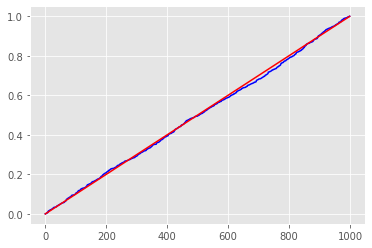

In [22]:
n = 1000
pval_list = [ttest_ind(norm.rvs(size=200), norm.rvs(size=100)).pvalue for _ in range(n)]
pval_list.sort()
sns.lineplot(x=range(n), y=pval_list, color = 'blue')
sns.lineplot(x=range(n), y=[float(i)/n for i in range(n)], color = 'red')

###### нормальное распределение

<AxesSubplot:>

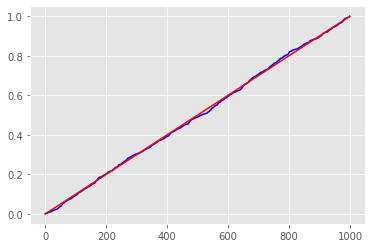

In [23]:
n = 1000
pval_list = [ttest_ind(norm.rvs(loc=5,scale=5,size=500), norm.rvs(loc=5,scale=5,size=1000)).pvalue for _ in range(n)]
pval_list.sort()
sns.lineplot(x=range(n), y=pval_list, color = 'blue')
sns.lineplot(x=range(n), y=[float(i)/n for i in range(n)], color = 'red')

###### среднии не равны (нормальное распределение)

<AxesSubplot:>

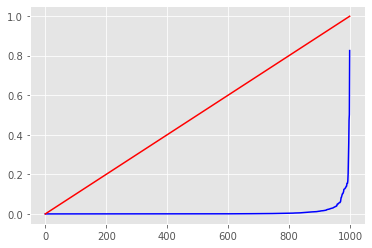

In [24]:
n = 1000
pval_list = [ttest_ind(norm.rvs(loc=4,scale=5,size=500), norm.rvs(loc=5,scale=5,size=1000)).pvalue for _ in range(n)]
pval_list.sort()
sns.lineplot(x=range(n), y=pval_list, color = 'blue')
sns.lineplot(x=range(n), y=[float(i)/n for i in range(n)], color = 'red')

По графикам видно, что они почти накладываются друг на друга в случае если среднии значения равны. Это свидетельствует о том, что функции написаны корректно (красная линия - это как должно выглядеть распределение p-value).

### Часть 1

Будем использовать уровень значимости 0.05

###### среднии  равны

In [41]:
a_1 = 5
a_2 = 5
n = 200
sigma = 2
alpha = 0.05
sample_1 = norm.rvs(loc=a_1,scale=sigma,size=n)
sample_2 = norm.rvs(loc=a_2,scale=sigma,size=n)
result = ttest_ind(sample_1, sample_2)
if result.pvalue > alpha:
    print('Нет оснований для отвержения гипотезы о равенстве средних')
else:
    print('Гипотеза о равенстве средних отвергается на заданном уровне значимости')
print('p-value :', result.pvalue)

Нет оснований для отвержения гипотезы о равенстве средних
p-value : 0.41355093834946044


###### среднии не равны

In [42]:
a_1 = 5
a_2 = 6
n = 200
sigma = 2
alpha = 0.05
sample_1 = norm.rvs(loc=a_1,scale=sigma,size=n)
sample_2 = norm.rvs(loc=a_2,scale=sigma,size=n)
result = ttest_ind(sample_1, sample_2)
if result.pvalue > alpha:
    print('Нет оснований для отвержения гипотезы о равенстве средних')
else:
    print('Гипотеза о равенстве средних отвергается на заданном уровне значимости')
print('p-value :', result.pvalue)

Гипотеза о равенстве средних отвергается на заданном уровне значимости
p-value : 4.364318287904823e-08


### Часть 2

Здесь необходимо указать часть теории, которую я буду использовать для моделирвания случайных величин с заданным коэффициентом корреляции.

Заметим, что для коэффициента корреляции верен следующий факт: $\rho(a\xi + b, c \eta + d) = sgn(ac)\rho(\xi, \eta)$

Пусть имеется заданный коэффициент корреляции и дисперсия. Тогда утверждаю, что случайные величины $\xi, \eta$ имют коэффициент корреляции $\rho$, и распределены $N(0,\sigma^2)$ 

$\xi \sim N(0, \sigma^2)$

$\nu \sim N(0, \sigma^2)$

$\eta = \rho\xi + \sqrt{1-\rho^2}\nu$

Доказательство данного факта.
1. $\xi$ имеет распределение $N(0,\sigma^2)$ по условию.
2. Сумма нормально распределенных случайных величин есть нормальная величина с другим средним и дисперсией: $\xi \sim N(a_1, \sigma^2_1), \eta \sim N(a_2, \sigma^2_2) \Rightarrow \xi + \eta \sim N(a_1 + a_2, \sigma^2_1 + \sigma^2_2)$. Так же я буду пользоваться тем, что $\xi \sim N(0, l^2), \eta = \sigma\xi+a \Rightarrow \eta \sim N(a, l^2 \sigma^2) $.


$\rho\xi \sim N(0, \sigma^2\rho^2)$


$\sqrt{1-\rho^2}\nu \sim N(0, \sigma^2(1 - \rho^2))$

$\eta = \rho\xi + \sqrt{1-\rho^2}\nu \sim N(0, \sigma^2)$

Таким образом $\eta$ действительно имеет распределение $N(0,\sigma^2)$. Осталось показать что коэффициент корреляции $\xi$ и $\eta$ равен $\rho$. 

$\rho (\xi, \eta) = \frac{cov(\xi, \eta)}{\sqrt{D(\xi)} \sqrt{D(\eta)}} =  \frac{E(\xi\eta) - E(\xi)E(\eta)}{\sqrt{D(\xi)} \sqrt{D(\rho\xi + \sqrt{1-\rho^2}\nu )}} = \frac{E(\rho\xi^2 + \sqrt{1-\rho^2}\nu\xi )}{\sqrt{D(\xi)} \sqrt{D(\rho\xi + \sqrt{1-\rho^2}\nu )}} = \frac{\rho E(\xi^2) + \sqrt{1-\rho^2}E(\nu\xi )}{\sqrt{D(\xi)} \sqrt{\rho^2 D(\xi) + (1-\rho^2)D(\nu )}} =  $

$ = \frac{\rho E(\xi^2) + \sqrt{1-\rho^2}E(\nu) E(\xi )}{\sigma \sqrt{\rho^2 \sigma^2 + (1-\rho^2)\sigma^2}} = \frac{\rho E(\xi^2)}{\sigma \sqrt{\sigma^2}} =  \frac{\rho \sigma^2}{\sigma^2} = \rho $

Таким образом показал, что при выше указанном преобразовании получаются случайные величины, имеющие распределение $N(0,\sigma^2)$ с коэффициентом корреляции $\rho$. 

Теперь, если необходимо, чтобы среднее значение не было равно 0, мы можем просто добавить константы к нашим случайным величинам. 

$\xi_{fix} = \xi + a_1 \sim N(a_1, \sigma^2)$

$\eta_{fix} = \eta + a_2 \sim N(a_2, \sigma^2)$

$\rho(\xi_{fix}, \eta_{fix}) = \rho(\xi + a_1, \eta + a_2) = \rho (\xi, \eta) = \rho$

Замечание: к.к. - коэффициент корреляции. 

Зависимость ошибки первого рода от $\alpha$, при $\rho = -0.5, -0.1, -0.05, 0, 0.05, 0.1, 0.5$ (среднии равны)

In [54]:
def error_1(rho, a_1=5,a_2=5,sigma=2,n = 200,alpha_step = 1/100,repeat = 200):
    error_1_list = []
    for alpha in np.arange(0, 1, alpha_step):
        s = 0
        for i in range(repeat):
            sample_1 = norm.rvs(loc=a_1,scale=sigma,size=n)
            sample_2 = norm.rvs(loc=a_2,scale=sigma,size=n)
            sample_2 = rho*sample_1 + math.sqrt(1 - rho**2)* sample_2 
            result = ttest_ind(sample_1, sample_2)
            if result.pvalue < alpha:
                s += 1
        error_1_list.append(s/repeat)
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plot = sns.lineplot(x=np.arange(0, 1, alpha_step), y=error_1_list, color = 'blue')
    plot.set_title(f'Зависимость ошибка первого рода(среднии равны, к.к. {rho}')
    plot.set_ylabel('Ошибка первого рода')
    plot.set_xlabel('Уровень значимости')  
    

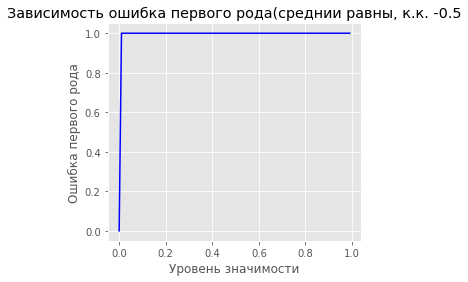

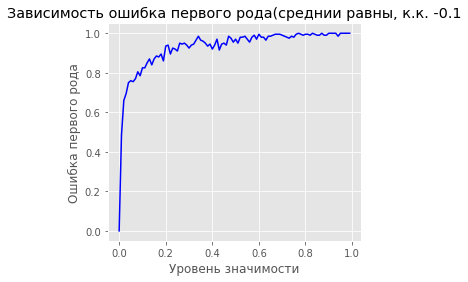

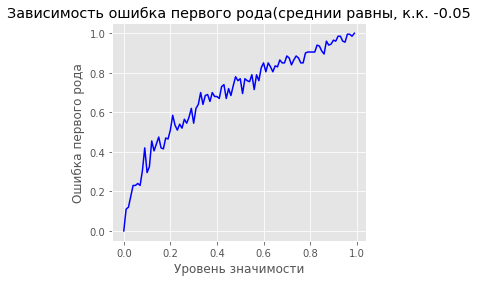

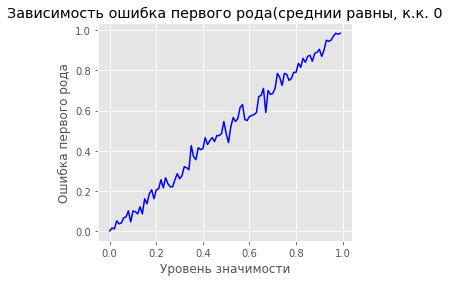

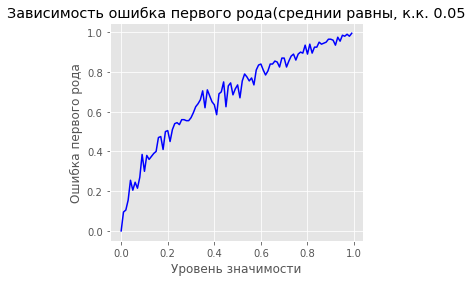

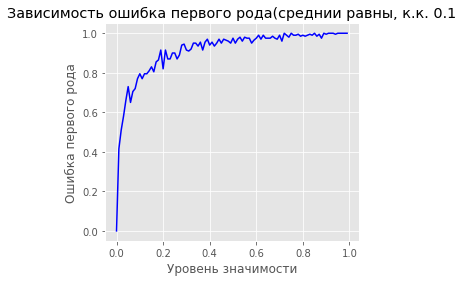

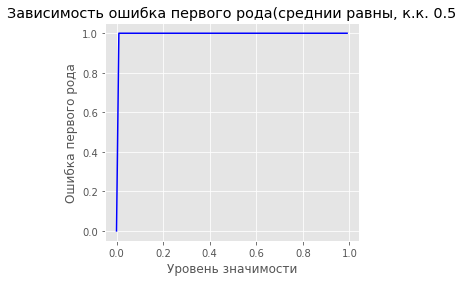

In [55]:
rho = [-0.5, -0.1, -0.05, 0, 0.05, 0.1, 0.5]
for i in range(len(rho)):
    error_1(rho[i])

Как видно из графика ошибка первого рода больше уровня значиомсти. А следовательно критерий радикальный

Зависимость ошибки первого рода от $\alpha$, при $\rho = -0.5, -0.1, -0.05, 0, 0.05, 0.1, 0.5$ (среднии не равны равны))

In [68]:
def error_2(rho, a_1=3,a_2=5,sigma=2,n = 200,alpha_step = 1/100,repeat = 200):
    error_2_list = []
    for alpha in np.arange(0, 1, alpha_step):
        s = 0
        for i in range(repeat):
            sample_1 = norm.rvs(loc=a_1,scale=sigma,size=n)
            sample_2 = norm.rvs(loc=a_2,scale=sigma,size=n)
            sample_2 = rho*sample_1 + math.sqrt(1 - rho**2)* sample_2 
            result = ttest_ind(sample_1, sample_2)
            if result.pvalue > alpha:
                s += 1
        error_2_list.append(s/repeat)
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plot = sns.lineplot(x=np.arange(0, 1, alpha_step), y=error_2_list, color = 'blue')
    plot.set_title(f'Зависимость ошибки второго рода(среднии не равны, к.к. {rho})')
    plot.set_ylabel('Ошибка второго рода')
    plot.set_xlabel('Уровень значимости')  

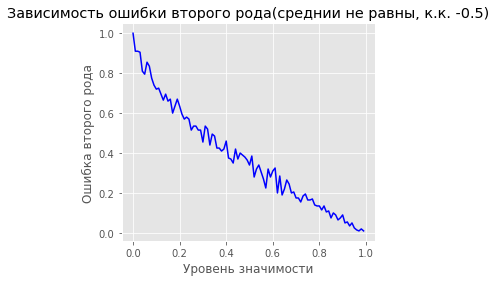

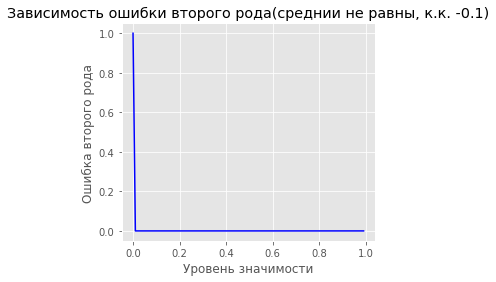

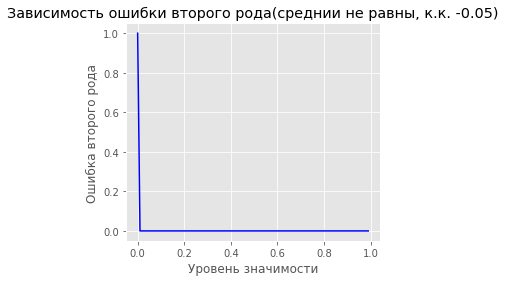

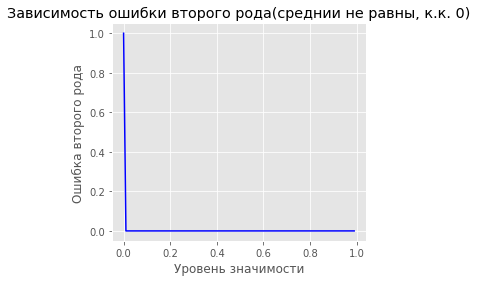

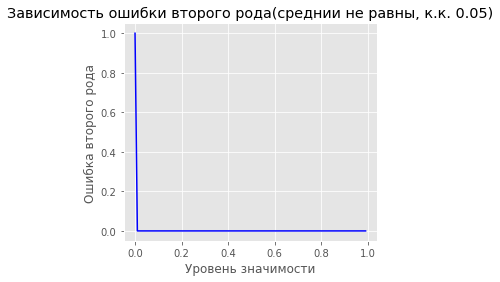

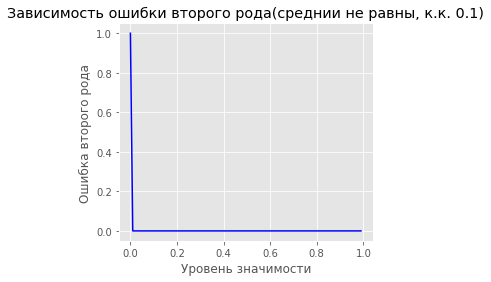

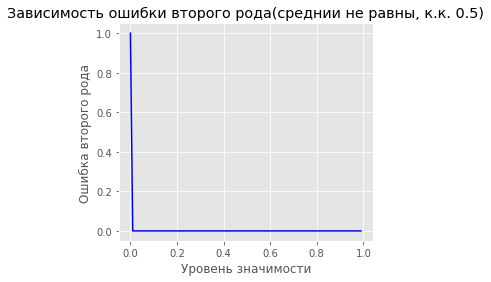

In [69]:
rho = [-0.5, -0.1, -0.05, 0, 0.05, 0.1, 0.5]
for i in range(len(rho)):
    error_2(rho[i])